# Twitter Sentiment Analysis of Covid-19 of Governors in USA

#### Description: This is made for the Undergraduate Big Data Challenge (UnBDC) 2020

Contributors: Stuart Martin, Jenney Ren, Riju Sikdar, Joyce Li

Reference: https://youtu.be/ujId4ipkBio

In [1]:
#Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud #include this library for wordcloud
import pandas as pd
import numpy as np
import pickle
import datetime
from datetime import datetime as dtworkaround
import time
import seaborn as sns
import re
import matplotlib.pyplot as plt
import pdb
from copy import deepcopy
plt.style.use('fivethirtyeight')

twitterAcc = "BarackObama"

In [5]:
#Obtain Twitter API credentials
#Create authentication object
#Set access token and access token secret
#Create API object while passing in authorization information

In [6]:
#Exctract tweets from Twitter user (e.g., Barack Obama)
startDate = datetime.datetime(2020, 3, 13, 0, 0, 0)
endDate =   datetime.datetime(2020, 5, 30, 0, 0, 0)

tweets = []
tmpTweets = apiFile.user_timeline(screen_name=twitterAcc, count=500, lang="en", tweet_mode="extended")
for tweet in tmpTweets:
    if tweet.created_at.date() <= endDate.date() and tweet.created_at.date() >= startDate.date():
        tweets.append(tweet)
atmpTweets = deepcopy(tmpTweets)

while (atmpTweets[-1].created_at >= startDate):
    atmpTweets = apiFile.user_timeline(screen_name=twitterAcc, max_id = atmpTweets[-1].id, lang="en", tweet_mode="extended")
    for tweet in atmpTweets:
        if tweet.created_at <= endDate and tweet.created_at >= startDate:
            tweets.append(tweet)

In [7]:
#Create data frame with column called "Tweets"
df = pd.DataFrame({"Date":[tweet.created_at.date() for tweet in tweets], "Tweets":[tweet.full_text for tweet in tweets]})

#Show the first 5 rows of data
df.head()

,Date,Tweets
0,2020-05-29,My statement on the death of George Floyd: htt...
1,2020-05-27,"If you believe in a more just, more generous, ..."
2,2020-05-25,"On Memorial Day, we honor those who gave all f..."
3,2020-05-23,And here’s more on the approach Sweden has tak...
4,2020-05-23,South Korea has focused on testing to guard ag...


In [8]:
tweet.created_at.date()

datetime.date(2019, 6, 19)

In [9]:
#Function to clean tweets
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removes @mentions
    text = re.sub(r'#', '', text) #Remove '#' symbols
    text = re.sub(r'RT[\s]+', '', text) #Remove RT's
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove hyperlinks
    text = re.sub(r'^:', '', text) #Remove ":" at start of line
    text = re.sub(r'&amp;', '', text) #Remove "&amp;"
    text = re.sub(r'/(\r\n|\n|\r|\\n)/gm', '', text) #Remove "&amp;"
    return text

In [10]:
df['Tweets'] = df['Tweets'].apply(cleanText)
df

,Date,Tweets
0,2020-05-29,My statement on the death of George Floyd:
1,2020-05-27,"If you believe in a more just, more generous, ..."
2,2020-05-25,"On Memorial Day, we honor those who gave all f..."
3,2020-05-23,And here’s more on the approach Sweden has tak...
4,2020-05-23,South Korea has focused on testing to guard ag...
...,...,...
69,2020-03-18,As communities have begun to recognize the imp...
70,2020-03-17,We owe a profound debt of gratitude to all our...
71,2020-03-15,"Not everybody can stay home, and we owe a big ..."
72,2020-03-15,Watch this. It shows why we should all do the ...


In [11]:
dataRange = pd.date_range(start=startDate, end=endDate)
dataRange = [dates.date() for dates in dataRange]

Text(0.5, 1.0, 'Number of Tweets Per Day (2020-03-13 to 2020-05-30)')

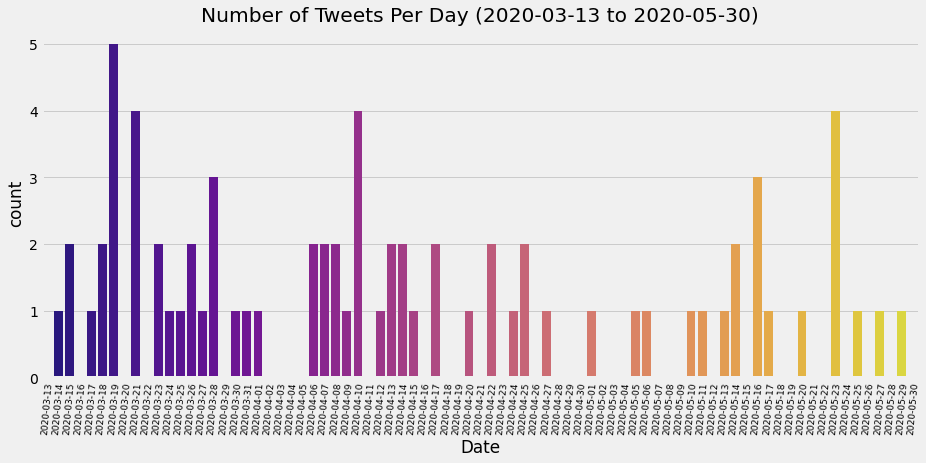

In [12]:
#Plot number of tweets everyday
fig = plt.figure(figsize = (14,6))
chart = sns.countplot(df['Date'], order = sorted(dataRange), palette="plasma")
chart.set_xticklabels(chart.get_xticklabels(), rotation=85, fontsize=9)
chart.set_title('Number of Tweets Per Day (' + str(startDate.date()) + ' to ' + str(endDate.date()) + ')')

In [13]:
#Function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [14]:
#Create 2 new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df

,Date,Tweets,Subjectivity,Polarity
0,2020-05-29,My statement on the death of George Floyd:,0.000000,0.000000
1,2020-05-27,"If you believe in a more just, more generous, ...",0.625000,0.375000
2,2020-05-25,"On Memorial Day, we honor those who gave all f...",0.500000,0.275000
3,2020-05-23,And here’s more on the approach Sweden has tak...,0.500000,0.500000
4,2020-05-23,South Korea has focused on testing to guard ag...,0.000000,0.000000
...,...,...,...,...
69,2020-03-18,As communities have begun to recognize the imp...,0.088889,0.144444
70,2020-03-17,We owe a profound debt of gratitude to all our...,0.693750,0.127083
71,2020-03-15,"Not everybody can stay home, and we owe a big ...",0.216667,0.125000
72,2020-03-15,Watch this. It shows why we should all do the ...,0.562143,-0.127857


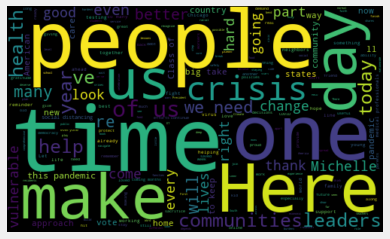

In [15]:
#Plot a word cloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [16]:
#Function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [17]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Date,Tweets,Subjectivity,Polarity,Analysis
0,2020-05-29,My statement on the death of George Floyd:,0.000000,0.000000,Neutral
1,2020-05-27,"If you believe in a more just, more generous, ...",0.625000,0.375000,Positive
2,2020-05-25,"On Memorial Day, we honor those who gave all f...",0.500000,0.275000,Positive
3,2020-05-23,And here’s more on the approach Sweden has tak...,0.500000,0.500000,Positive
4,2020-05-23,South Korea has focused on testing to guard ag...,0.000000,0.000000,Neutral
...,...,...,...,...,...
69,2020-03-18,As communities have begun to recognize the imp...,0.088889,0.144444,Positive
70,2020-03-17,We owe a profound debt of gratitude to all our...,0.693750,0.127083,Positive
71,2020-03-15,"Not everybody can stay home, and we owe a big ...",0.216667,0.125000,Positive
72,2020-03-15,Watch this. It shows why we should all do the ...,0.562143,-0.127857,Negative


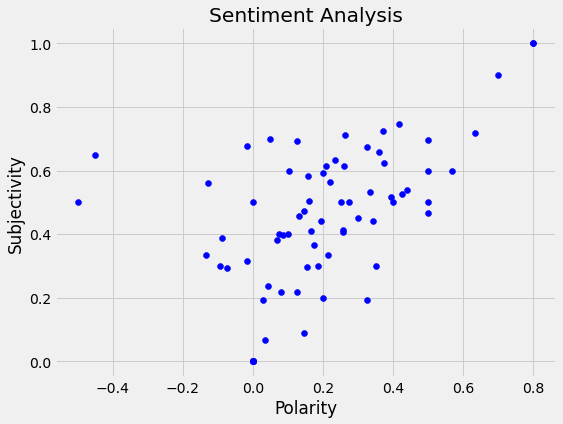

In [18]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [19]:
#Get percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round(ptweets.shape[0] / df.shape[0] * 100, 1)

77.0

In [20]:
#Get percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round(ntweets.shape[0] / df.shape[0] * 100, 1)

12.2

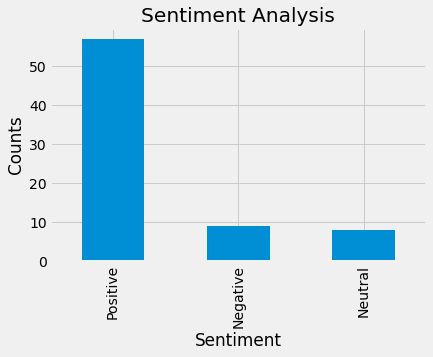

In [21]:
#Show value counts
df['Analysis'].value_counts()

#Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [22]:
df2 = pd.read_csv('covid19cases.csv')
df2

,date,total_cases,total_deaths
0,2020-03-13,1663,40
1,2020-03-14,2174,47
2,2020-03-15,2951,57
3,2020-03-16,3774,69
4,2020-03-17,4661,85
...,...,...,...
74,2020-05-26,1662302,98220
75,2020-05-27,1681212,98916
76,2020-05-28,1699933,100442
77,2020-05-29,1721750,101617


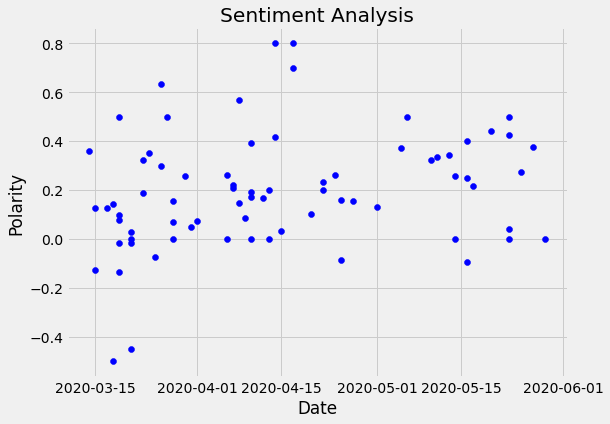

In [23]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Date'][i], df['Polarity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.show()

In [24]:
startdate = "13/03/2020"
enddate = "30/05/2020"
base = dtworkaround.strptime(startdate, "%d/%m/%Y")
datelist = pd.date_range(base, periods=79).tolist()
polaritylist = []

for date in datelist:
    polaritylist.append(df.loc[df["Date"]==date]["Polarity"].mean())
    
polaritypd = pd.DataFrame({"Date":datelist, "Polarity":polaritylist})
polaritypd['Polarity'] = polaritypd['Polarity'].fillna(0)

polaritypd

,Date,Polarity
0,2020-03-13,0.000000
1,2020-03-14,0.358333
2,2020-03-15,-0.001429
3,2020-03-16,0.000000
4,2020-03-17,0.127083
...,...,...
74,2020-05-26,0.000000
75,2020-05-27,0.375000
76,2020-05-28,0.000000
77,2020-05-29,0.000000


In [25]:
import math

def roundup(x):
    return int(math.ceil(x / 10.0)) * 10

In [26]:
maxY = roundup(df2['total_cases'][78])

No handles with labels found to put in legend.


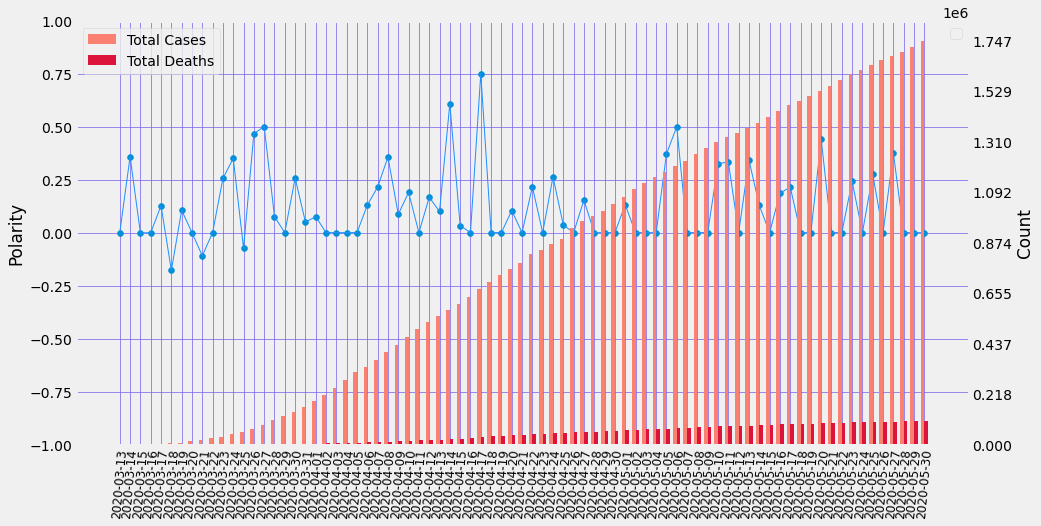

In [27]:
#Get all available dates
x = np.arange(len(df2['date']))  # the label locations
width = 0.35  # the width of the bars

#Graph both plots
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(x,polaritypd['Polarity'])
ax1.plot(x,polaritypd['Polarity'], linewidth=1, color='dodgerblue')
rects1 = ax2.bar(x - width/2, df2['total_cases'], width, label='Total Cases', color='salmon')
rects2 = ax2.bar(x + width/2, df2['total_deaths'], width, label='Total Deaths', color='crimson')

ax1.grid(color='#7b68ee', linewidth=0.75)
ax2.grid(b=False)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Polarity')
ax1.set_yticks(np.linspace(-1, 1, 9))
ax1.set_xticks(x)
ax1.set_xticklabels(chart.get_xticklabels(), rotation=85, fontsize=12)
ax1.legend()

ax2.set_ylabel('Count')
ax2.set_yticks(np.linspace(0, maxY, 9))
ax2.legend()

fig.tight_layout()
fig.set_size_inches(20, 10)

In [28]:
govs = pd.read_csv("governerTwitters.csv")
govs

,state,name,handle
0,Alabama,Kay Ivey,GovernorKayIvey
1,Alaska,Mike Dunleavy,GovDunleavy
2,Arizona,Doug Ducey,dougducey
3,Arkansas,Asa Hutchinson,AsaHutchinson
4,California,Gavin Newsom,GavinNewsom
5,Colorado,Jared Polis,GovofCO
6,Connecticut,Ned Lamont,GovNedLamont
7,Delaware,John Carney,carney
8,Florida,Ron DeSantis,GovRonDeSantis
9,Georgia,Brian Kemp,GovKemp
